## Monte Carlo

BOUCHET Antoine & CHRISTOPHER Steven

# Random numbers

### question 1 : redraw the histogram (for the uniform distribution) for 10 000, or even 1 000 000 random numbers.



In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline

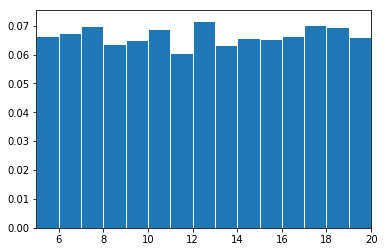

In [2]:
a=5 # the min value
b=20 # the max value

x = numpy.random.random_sample(10000)
y = (b-a)*x+a 

binwidth=1
pyplot.xlim(5,20)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),density=True, ec ="white");

now with a larger sample size

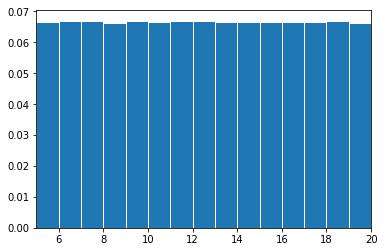

In [3]:
x = numpy.random.random_sample(1000000)
y = (b-a)*x+a
binwidth=1
pyplot.xlim(5,20)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),density=True, ec ="white");

We see that as expected, the histogram converges to the probability distribution function of the random numbers.

### Challenge 1 : Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

Let's try :

-randint(x,y) which returns an integer between x and y 

-gauss(x,y) which returns a number from a gaussian distribution with mean x and sigma y

-expovariate(x) which return a number from an exponential distribution with parameter x 


source : https://docs.python.org/3/library/random.html

In [4]:
import random
print (random.randint(1,10))
print (random.gauss(0,1))
print (random.expovariate(1))

3
-1.6593483952905963
0.6198752242888259


#### Let's compare the exponential distributions :

(first the version implemented in the notebook)

(This is not our code, it is taken from the notebook)

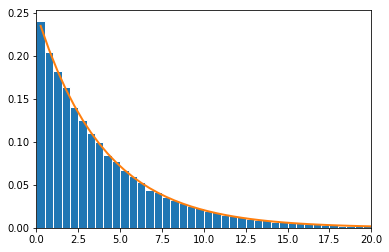

In [5]:
alpha = 0.25 # rate of the exponential distribution

x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,density=True,ec ="white");

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

no surprises here. it works as in the notebook

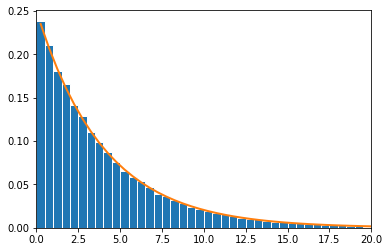

In [6]:
#now using the built in generator

z=[]    # a list we will use to store the generated values

for i in range(100000):     #loop for the desired number of values. We chose 100000. 
    a = random.expovariate(alpha)
    z.append(a)
    i+=1
    
# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(z,bins,density=True,ec ="white");


pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Looks good. 

Let's try to overlay both histograms to see if they indeed converge to one another

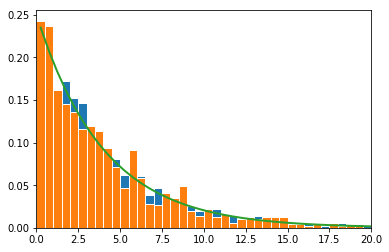

In [7]:
# First generate numbers with the notebook version: 

x = numpy.random.random_sample(1000)
y = -1/alpha*numpy.log(1-x)

# now with the built in version
z=[]
for i in range(1000):
    a = random.expovariate(alpha)
    z.append(a)
    i+=1

    
# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0,21, binwidth)
pyplot.hist(y,bins, label ="Notebook", density=True,ec ="white")
pyplot.hist(z,bins, label ="Built in",density=True,ec ="white")


pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Now let's try with a bigger sample size

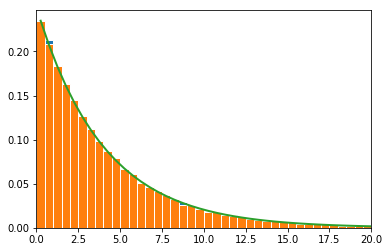

In [8]:

x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)
z=[]
for i in range(100000):
    a = random.expovariate(alpha)
    z.append(a)
    i+=1

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0,21, binwidth)
pyplot.hist(y,bins, label ="Notebook", density=True,ec ="white")
pyplot.hist(z,bins, label ="Built in",density=True,ec ="white")

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

As expected

### Gaussian comparison : 

Just like for the exponential distribution we use the notebook version first

Size of accepted set h and expected size 1/K: 71195 71428.57142857143


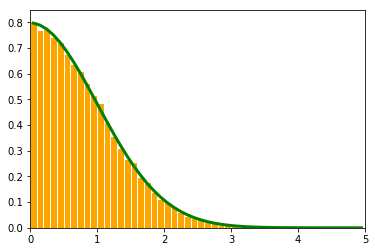

In [37]:
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.xlim(0,5)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),density=True,color='orange', ec="white");

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Now using the built in generator 

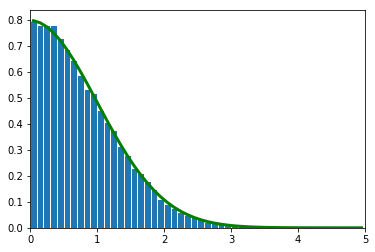

In [10]:
z=[]       # a list we will use to store the generated values

for i in range(100000):   # a loop for the desired number of values
    a = random.gauss(0,1)
    z.append(a)
    i+=1
    
# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(z,bins,density=True,ec ="white");


pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

Again, we'll overlay the distributions

Size of accepted set h and expected size 1/K: 71244 71428.57142857143


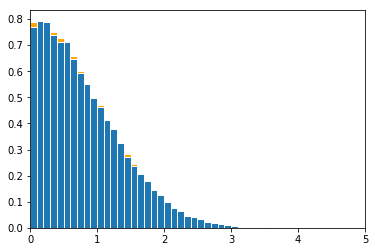

In [11]:
#Overlaying the distributions
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

z=[]
for i in range(100000):
    a = random.gauss(0,1)
    z.append(a)
    i+=1

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.xlim(0,5)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),density=True,color='orange', ec="white");
pyplot.hist(z,bins,density=True,ec ="white");



### Challenge 2 : Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

Let's implement the algorithm

In [12]:
u=numpy.random.random_sample(2)   #draw the 2 random numbers

v=numpy.sqrt(-2*numpy.log(u[0]))* numpy.cos(2*numpy.pi*u[1])
w=numpy.sqrt(-2*numpy.log(u[0]))* numpy.sin(2*numpy.pi*u[1])

print (v,w)

-0.4699767732369111 -0.7062174988562717


Now let's loop and put the results in a histogram to see that it worked as expected

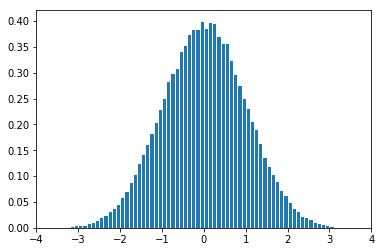

In [13]:
x=[]
for i in range(100000):
    u=numpy.random.random_sample(2)
    v=numpy.sqrt(-2*numpy.log(u[0]))* numpy.cos(2*numpy.pi*u[1])
    w=numpy.sqrt(-2*numpy.log(u[0]))* numpy.sin(2*numpy.pi*u[1])
    x.append(v)
    x.append(w)
    i+=1
    
# Plots
binwidth=0.1
pyplot.xlim(-4,4)
bins=numpy.arange(-4.1,4.1, binwidth)
pyplot.hist(z,bins,density=True,ec ="white");    

We can see that we accept negative values. 

Let's only take positive values.

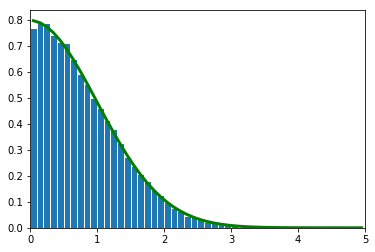

In [14]:
x=[]
for i in range(100000):
    u=numpy.random.random_sample(2)
    v=numpy.sqrt(-2*numpy.log(u[0]))* numpy.cos(2*numpy.pi*u[1])
    w=numpy.sqrt(-2*numpy.log(u[0]))* numpy.sin(2*numpy.pi*u[1])
    if v < 0 : 
        v=-v
    if w < 0 :
        w=-w
    x.append(v)
    x.append(w)
    i+=1
    
# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0,5.1, binwidth)
pyplot.hist(z,bins,density=True,ec ="white");  



pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

## Random walk

Play with the parameters of the problem  (α,μ,σ,npart)  and check that the algorithm works as expected.

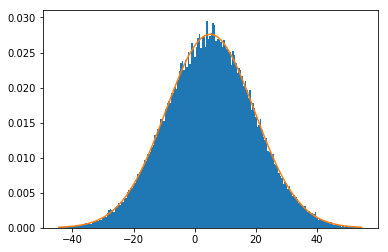

In [15]:
#we use the code from the notebook :
#let's try α = 2, μ = 5, σ = 3

# ----
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=5
sigma = 3.0
x0 = numpy.random.normal(loc=5,scale=sigma,size=npart)


# ------

T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)


#-----

# Generate bins centered around 5
binwidth_2=0.5
bins_2=numpy.arange(-45,55,binwidth_2)
bins_2 = bins_2 + binwidth_2/2

# Compute bin centers
bin_centers_2 = bins_2[:-1]+binwidth_2/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins_2,density=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers_2 , numpy.exp(-(bin_centers_2-5)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))



## Challenge : Add as systematic contribution to the displacement  dx
$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$


We only have to change the formula for x[i+1]=...

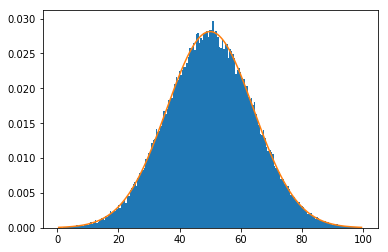

In [16]:
# ----
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
c=1
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)
# ------
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart) + c*dt # we add c*dt 
#-----
# Generate bins centered around 0 + T*c
binwidth_2=0.5
bins_2=numpy.arange(50-T*c,50+T*c,binwidth_2)
bins_2 = bins_2 + binwidth_2/2

# Compute bin centers
bin_centers_2 =bins_2[:-1]+binwidth_2/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins_2,density=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers_2, numpy.exp(-(bin_centers_2-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))


the systematic contribution on the displacement is giving all the molecules speed c. 

## Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

The solution is a gaussian with same sigma as before but the mean is moving as time increases.

$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu - ct)^2}{2\sigma_t^2}}
$$

## Simulate the following random walk with a 'friction' term:
$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Again, we only have to change the formula for x[i+1]=...

we chose to set gamma = 1

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e-04, 1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e-04, 3.000e-04, 5.000e-04, 1.000e-04, 8.000e-04, 6.000e-04,
        7.000e-04, 5.000e-04, 1.000e-03, 1.300e-03, 9.000e-04, 1.800e-03,
        3.100e-03, 2.800e-03, 3.500e-03, 5.500e-03, 6.100e-03, 8.600e-03,
        9.900e-03, 1.170e-02, 1.160e-02, 1.380e-02, 1.480e-02, 2.060e-02,
        2.530e-02, 2.910e-02, 2.930e-02, 3.490e-02, 4.320e-02, 4.930e-02,
        5.510e-02, 6.330e-02, 7.190e-02, 7.700e-02, 8.120e-02, 9.470e-02,
        1.062e-01, 1.153e-01, 1.323e-01, 1.428e-01, 1.526e-01, 1.668e-01,
        1.785e-01, 1.853e-01, 1.982e-01, 2.103e-01, 2.207e-01, 2.333e-01,
        2.310e-01, 2.384e-01, 2.482e-01, 2.595e-01, 2.780e-01, 2.801e-01,
        2.695e-01, 2.721e-01, 2.744e-01, 2.715e-01, 2.682e-01, 2.646e-01,
        2.607e-01, 2.537e-01, 2.432e-0

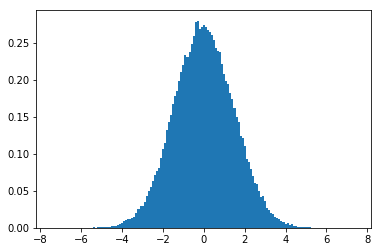

In [17]:
# ----
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)
# ------
T=50.0
nt=500
dt=T/nt
alpha=2.0

γ=1 # set gamma to 1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart) -γ*x[i]*dt
#-----
# Generate bins centered around 0 + T*c
binwidth_2=0.1
bins_2=numpy.arange(-7.5,7.5,binwidth_2)
bins_2 = bins_2 + binwidth_2/2

pyplot.hist(x[nt],bins_2,density=True)



#------


## Check that the distribution reaches a steady state for $t\rightarrow \infty$.

To do this we have several options. 

We could substract 2 solutions at different times with $t_2$ > $t_1$ >> 1 and see that it converges to zero. 

Here we chose to draw 2 histograms for $t_2$ > $t_1$ >> 1 and compare them

(array([0.00066687, 0.00033343, 0.0010003 , 0.00133373, 0.00166717,
        0.0020006 , 0.0050015 , 0.00766897, 0.0140042 , 0.01533793,
        0.020006  , 0.03034244, 0.04334634, 0.04868127, 0.07035444,
        0.08135774, 0.10303091, 0.12503751, 0.13470708, 0.13804141,
        0.16871728, 0.17238505, 0.18972358, 0.18805642, 0.19605882,
        0.19905972, 0.19005702, 0.18939015, 0.16004801, 0.15638025,
        0.13137275, 0.11803541, 0.09402821, 0.08102431, 0.06468607,
        0.05068187, 0.04434664, 0.02834184, 0.0190057 , 0.01167017,
        0.0140042 , 0.00666867, 0.00733553, 0.00333433, 0.00366777,
        0.00033343, 0.00066687, 0.00033343, 0.        ]),
 array([-7.35, -7.05, -6.75, -6.45, -6.15, -5.85, -5.55, -5.25, -4.95,
        -4.65, -4.35, -4.05, -3.75, -3.45, -3.15, -2.85, -2.55, -2.25,
        -1.95, -1.65, -1.35, -1.05, -0.75, -0.45, -0.15,  0.15,  0.45,
         0.75,  1.05,  1.35,  1.65,  1.95,  2.25,  2.55,  2.85,  3.15,
         3.45,  3.75,  4.05,  4.35,  4.65,  4.

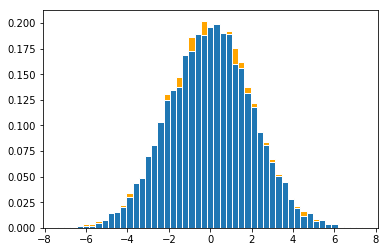

In [18]:
# ----
# Generate a set of initial positions based on the Gaussian distribution
npart=10000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)
# ------
T=5000
nt=5000
dt=T/nt
alpha=2.0
γ=1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart) -γ*x[i]*dt
#-----
T_2=50000.0
nt_2=50000
dt_2=T_2/nt_2

t_2 = numpy.arange(0,T_2+dt_2,dt_2)
x_2 = numpy.empty([nt_2+1,npart])

x_2[0]=x0

for i in range(nt_2):
    x_2[i+1]=x_2[i]+numpy.sqrt(2*alpha*dt_2)*numpy.random.normal(0,1,npart) -γ*x_2[i]*dt_2


    
# Generate bins centered around 0 + T*c
binwidth_2=0.3
bins_2=numpy.arange(-7.5,7.5,binwidth_2)
bins_2 = bins_2 + binwidth_2/2

pyplot.hist(x[nt],bins_2,density=True, color='orange', ec="white")
pyplot.hist(x_2[nt_2],bins_2,density=True, ec="white")



The two distribution do look similar even though one has t=5000 and the other has $t_2$=50000.0

## Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

We couldn't guess the governing equation in this case

Let's try minimizing using the "moindres carrés" method to find the analytical solution

We will assume that the solution is a gaussian centered in 0

In [19]:
# we define a gaussian function that we'll need later on
def gaussian(Q,S):
    return  ((numpy.exp(-(S**2)/(2*Q**2)))/(numpy.sqrt(2*numpy.pi*Q**2)))

In [20]:
# we put the date in a histogram
hist, bin_edges = numpy.histogram(x, bins= 50, density = True)

In [21]:
# compute the bin centers
binscenters=[]
for i in range (len(bin_edges)-1):
    binscenters.append(bin_edges[i]+(bin_edges[1]-bin_edges[0])/2)

In [22]:
# we run the algorithm and expect sigma to be between 1 and 5
Qmin = 1
Qmax = 5

R = []

# we create a list of possible sigma. they will range from Qmin to Qmax with a 0.001 step
tt = numpy.arange(Qmin, Qmax, 0.001)

#now we calculate the moindres carrés for every sigma in tt
for tau in tt:  
    Sum=0
    for i in range (len(binscenters)) : 
        Sum =Sum + (hist[i]-gaussian(tau,binscenters[i]))**2
    R.append(Sum)
        
Qbest = tt[numpy.where(R == numpy.min(R))]  # Qbest is the best sigma we could find to fit our data 
#-----
print (Qbest)

[2.004]


Note : this code was taken (and modified) from a previous project. 
Some of which was inspired by Prof. Juan A. Aguilar

Let's fit our data and a gaussian with the sigma we found

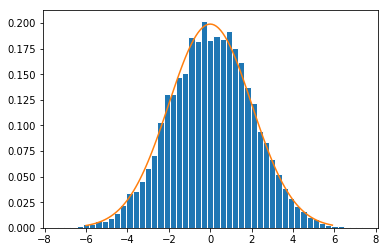

In [23]:
pyplot.hist(x[nt],bins_2,density=True, ec ="white")

L= numpy.arange(-6, 6, 0.1)
pyplot.plot(L, gaussian(Qbest,L))


Not bad. The solution is a gaussian centered in 0 with sigma $\approx$ 2.004 

## Ising model

### Challenge: Check that this is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.

First we import useful code from the MOOC

In [24]:
def initial_state(nx,ny):
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [25]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
from matplotlib import animation

In [26]:
nx=15
ny=15

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

In [27]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy



In [28]:
def metropolis_at_site(sp,alpha,ix,iy):
    
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Now we will check the algorithm for 20 random 15x15 lattice configurations. 
We will also check at random spots

In [29]:
nx=15
ny=15
alpha = 0.1
delta_E = 0


for i in range (20) :  # loop on 20 lattices
    sp = initial_state(15,15)
    
    x=random.randint(0,14) # pick a random x spot
    y=random.randint(0,14) # pick a random y spot 
    
    delta_E = energy_at_site(sp,alpha,+1,x,y) - energy_at_site(sp,alpha,-1,x,y)
    
    print (" relative probability up/down is ")
    print ( numpy.exp(-delta_E))
    
    NMC = 100000
    states = numpy.empty(NMC+1)
    states[0]=sp[x,y]

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,x,y)
        states[n]=sp[x,y]

    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    print ("the number of up/down is")
    print(ups/downs)
    print ("")
    print ("")

 relative probability up/down is 
1.0
the number of up/down is
1.0


 relative probability up/down is 
1.0
the number of up/down is
1.0


 relative probability up/down is 
1.0
the number of up/down is
1.0


 relative probability up/down is 
0.6703200460356393
the number of up/down is
0.6720450783353119


 relative probability up/down is 
1.4918246976412703
the number of up/down is
1.4868198547697205


 relative probability up/down is 
0.6703200460356393
the number of up/down is
0.6723806338322602


 relative probability up/down is 
0.6703200460356393
the number of up/down is
0.6696999549181012


 relative probability up/down is 
1.0
the number of up/down is
1.0


 relative probability up/down is 
1.0
the number of up/down is
1.0


 relative probability up/down is 
0.6703200460356393
the number of up/down is
0.6700345697155932


 relative probability up/down is 
0.6703200460356393
the number of up/down is
0.6712067784146932


 relative probability up/down is 
1.4918246976412703
the numb

Let's also check the difference and the relative difference

In [30]:
nx=15
ny=15
alpha = 0.1
delta_E = 0
for i in range (20) :  # loop on 20 lattices
    sp = initial_state(15,15)
    
    x=random.randint(0,14) # pick a random x spot
    y=random.randint(0,14) # pick a random y spot 
    
    delta_E = energy_at_site(sp,alpha,+1,x,y) - energy_at_site(sp,alpha,-1,x,y)
    
    NMC = 100000
    states = numpy.empty(NMC+1)
    states[0]=sp[x,y]

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,x,y)
        states[n]=sp[x,y]
        
    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    
    print ("the difference is")
    print(abs(numpy.exp(-delta_E) - ups/downs))
    print ("the relative difference is")
    print ( 100*(abs(numpy.exp(-delta_E) - ups/downs) /numpy.exp(-delta_E) ), "%")
    
    print ("")
    print ("")

the difference is
0.003146053312478636
the relative difference is
0.7001670410140507 %


the difference is
0.0
the relative difference is
0.0 %


the difference is
0.0
the relative difference is
0.0 %


the difference is
0.006364638984412974
the relative difference is
0.4266345097031929 %


the difference is
0.001567812207630137
the relative difference is
0.10509359511938707 %


the difference is
0.0
the relative difference is
0.0 %


the difference is
0.000150656269529037
the relative difference is
0.006769422552524712 %


the difference is
0.00027251314510212676
the relative difference is
0.040654184029525184 %


the difference is
0.0010084071823617258
the relative difference is
0.06759555489033812 %


the difference is
0.0
the relative difference is
0.0 %


the difference is
0.006052107074721036
the relative difference is
0.4056848692939623 %


the difference is
0.007800358600293489
the relative difference is
0.5228736736043227 %


the difference is
0.0
the relative difference is
0.

The relative difference is very small (<1%). We can say that the algorithm is very accurate. 

### Perform a series of runs with  α∈[01]  and plot the average energy of the system and its magnetisation as a function of  α . Estimate the critical value of  α at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?

In [31]:
nx = 100
ny = 100

sp = numpy.ones([nx,ny])
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Let's perfom 10 runs with alpha ranging from 0.1 to 1

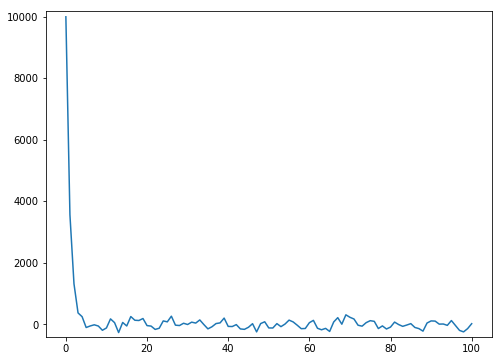

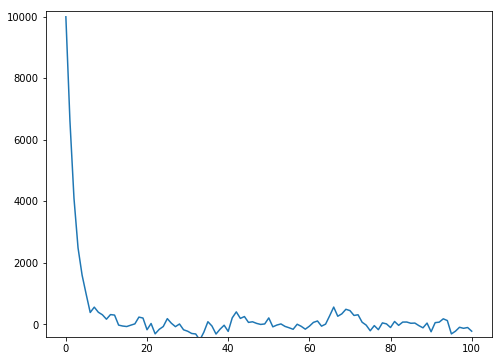

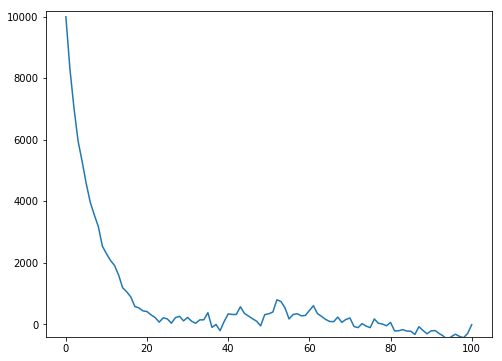

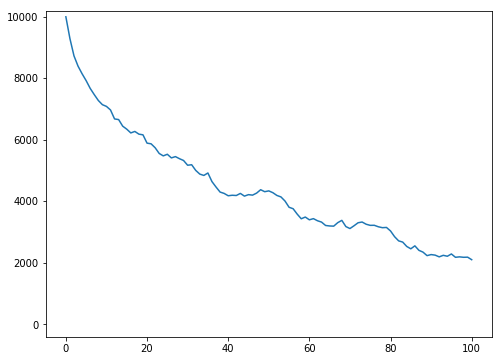

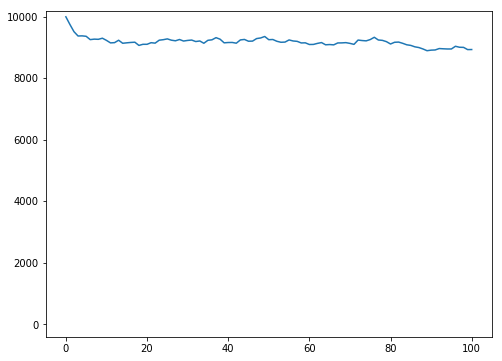

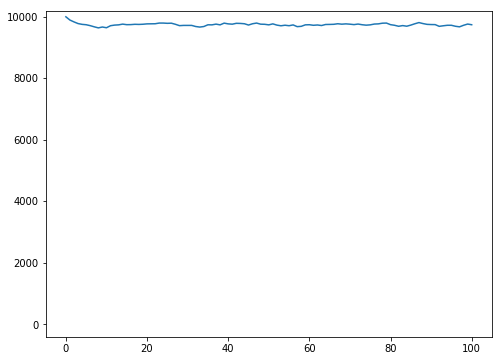

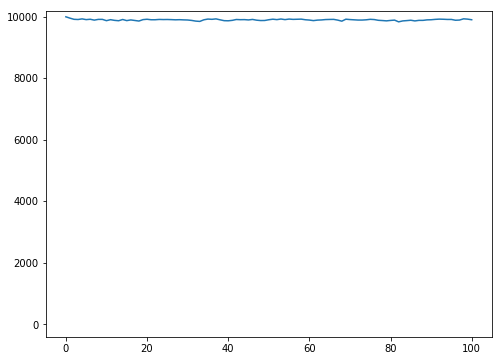

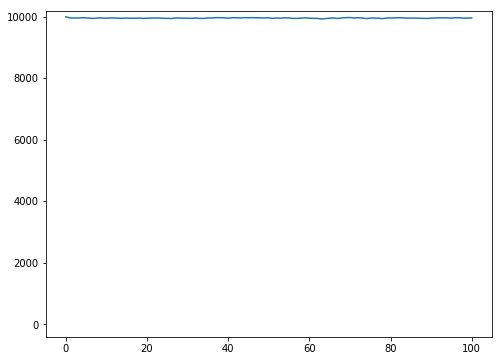

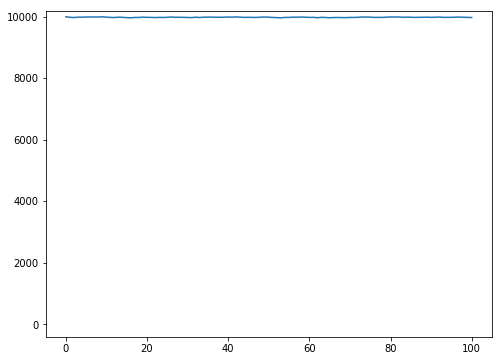

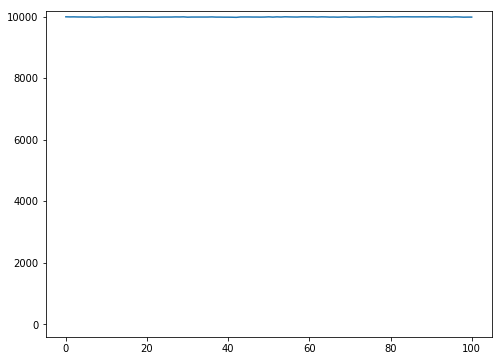

In [32]:
NMC=100
for i in range (1,11) :
    alpha=i/10
    sp = numpy.ones([nx,ny])
    states_i = ising_model_metropolis(sp, NMC, nx, ny, alpha)    
    
    figi, axi = pyplot.subplots(figsize = (8,6))
    pyplot.ylim(-400,10200)
    axi.plot(states_i.sum(axis=(1,2)),label=r'$\alpha=i/10$')
    

Now let's plot the Total_Energy and the magnetisation

To do this we will sum on states 80 to 100. As the states before are not near equilibrium and since we sum on a small/finite number of state including states from 0 to 80 would false our average

In [33]:
Energy = 0 # a variable we will need to compute the total energy
Total_Energy = 0 
Magnetisation = 0
nx = 100
ny = 100

NMC=100
for i in range (1,11) : 
    alpha=i/10
    sp = numpy.ones([nx,ny])
    states_i = ising_model_metropolis(sp, NMC, nx, ny, alpha)    
    
    for k in range (80,100) :  # we sum on state 80 to 100
        sp =states_i[k] 
        for i in range (ny) : 
            for j in range (nx) :
                sigma = sp[i,j]
                # we compute energy as the sum of the energy at each site
                Energy = Energy + energy_at_site(sp,alpha,sigma,j,i) 
                j = j + 1
            i = i +1    
        Total_Energy = Total_Energy + Energy #sum the energy of each state
        Energy = 0 # reset Energy value for next loop
        Magnetisation =Magnetisation + numpy.sum(sp)
        k = k + 1 
    Total_Energy = Total_Energy / 20 
    Magnetisation = Magnetisation / 20
    print (alpha)
    print (Total_Energy)
    print (Magnetisation)
    print ("")
    print ("")
    Magnetisation = 0
    Total_Energy = 0

    

0.1
0.4000000000000158
-31.9


0.2
-6.320000000000069
-53.1


0.3
-148.91999999999945
6.0


0.4
-2504.7999999999424
3416.0


0.5
-16524.0
9078.8


0.6
-22808.40000000227
9748.2


0.7
-27489.27999999548
9908.2


0.8
-31717.120000004954
9955.8


0.9
-35890.55999999328
9984.8


1.0
-39932.0
9991.5




The transition occurs around alpha = 0.4

### Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration. For example, you could assume that on the borders all the spins are pointing upwards on the borders while they are randomly oriented in the bulk.

We will define new_ising_model_metropolis based on the old one but we only allow spins to point upwards on the border

In [34]:
nx = 100
ny = 100

sp = numpy.ones([nx,ny]) #all spins point in the same direction
def new_ising_model_metropolis(sp, NMC, nx, ny, alpha):

    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):   
        for j in range(0,nx*ny):
            ix=numpy.random.randint(1,nx-1)  #we cannot change the spins on the border
            iy=numpy.random.randint(1,ny-1)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

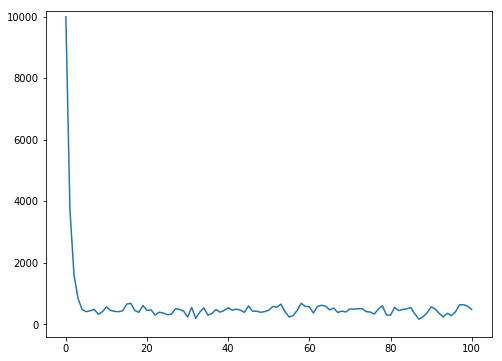

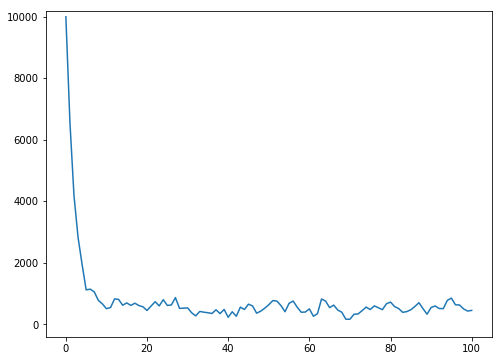

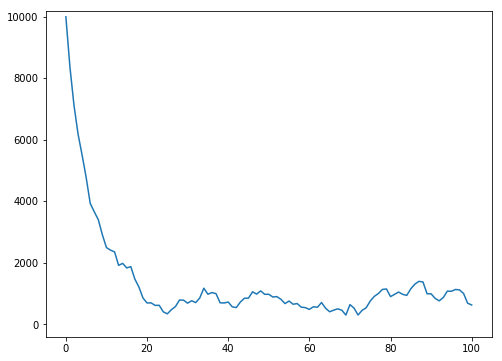

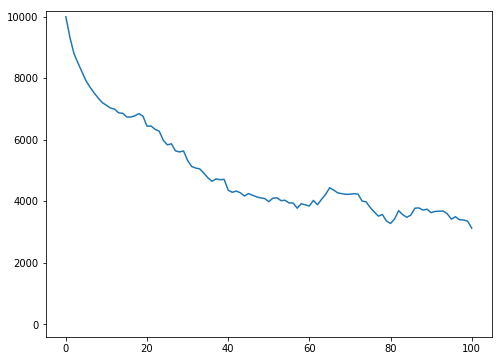

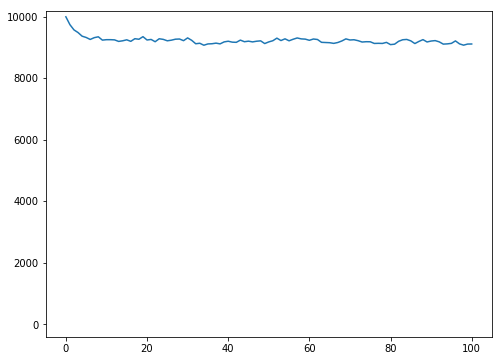

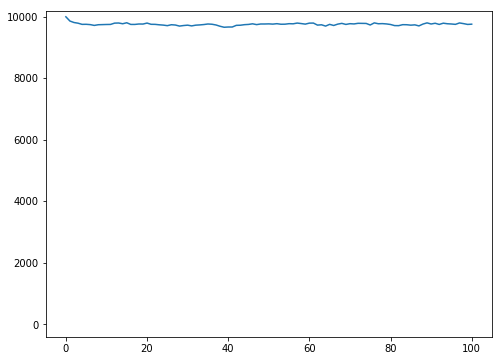

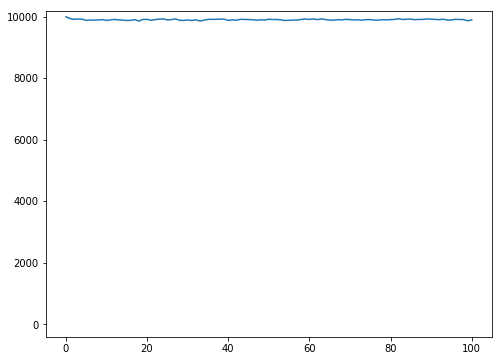

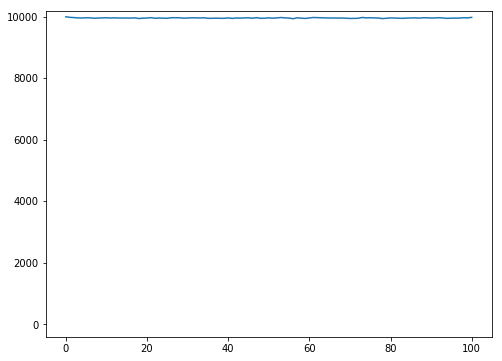

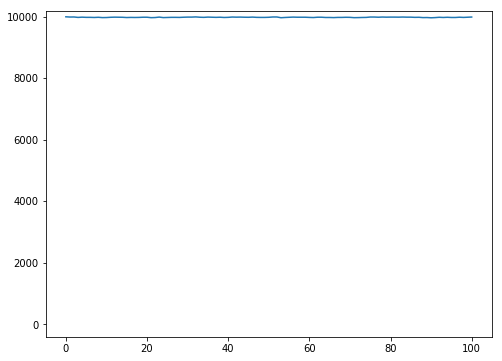

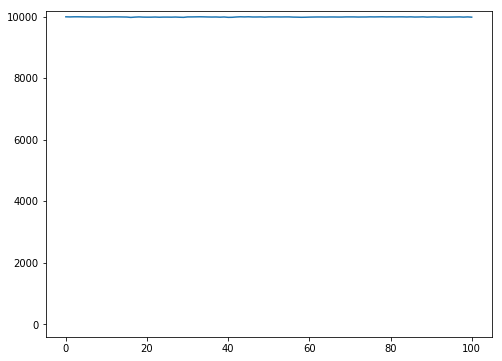

In [35]:
NMC=100
for i in range (1,11) :
    alpha=i/10
    sp = numpy.ones([nx,ny])
    states_i = new_ising_model_metropolis(sp, NMC, nx, ny, alpha)    
    
    figi, axi = pyplot.subplots(figsize = (8,6))
    pyplot.ylim(-400,10200)
    axi.plot(states_i.sum(axis=(1,2)),label=r'$\alpha=i/10$')
    

In [36]:
Energy = 0
Total_Energy = 0
Magnetisation = 0
nx = 100
ny = 100

NMC=100
for i in range (1,11) :
    alpha=i/10
    sp = numpy.ones([nx,ny])
    states_i = new_ising_model_metropolis(sp, NMC, nx, ny, alpha)    
    
    for k in range (80,100) : 
        sp =states_i[k] 
        for i in range (ny) : 
            for j in range (nx) :
                sigma = sp[i,j]
                Energy = Energy + energy_at_site(sp,alpha,sigma,j,i)
                j = j + 1
            i = i +1    
        Total_Energy = Total_Energy + Energy 
        Energy = 0
        Magnetisation =Magnetisation + numpy.sum(sp)
        k = k + 1 
    Total_Energy = Total_Energy / 20
    Magnetisation = Magnetisation / 20
    print (Total_Energy)
    print (Magnetisation)
    Magnetisation = 0
    Total_Energy = 0

    

-134.12000000000057
431.5
-362.6400000000015
582.7
-737.1600000000078
685.5
-3767.1999999999316
4520.1
-16723.0
9126.2
-22830.240000002297
9752.5
-27493.47999999548
9909.4
-31768.640000004973
9963.8
-35892.719999993285
9985.1
-39912.0
9989.0


We can see that for alpha << 1 we get different results in this case. 
This can easily be explained by the fact that almost all spins will change direction without boundary conditions. 
The difference is mainly due to the fixed spins. 

Whereas if alpha $\approx$ 1 most of the spins don't want to change direction, therefore it doesn't really matter to impose our boundary conditions


We also see that the conditions do not seem to change the transition value by a large amount